In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('Loan_Modelling.csv')

In [83]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [85]:
df.describe()


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [86]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [87]:
for col in df.columns:
    print(col,df[col].unique(),'',sep='\n-------------\n')

ID
-------------
[   1    2    3 ... 4998 4999 5000]
-------------

Age
-------------
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
-------------

Experience
-------------
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
-------------

Income
-------------
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 

In [88]:
df[df['Experience']<0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [89]:
len(df[df['Experience']<0])

52

In [90]:
df[df['Experience']<0].groupby(['Age','Education'])['Experience'].describe().T

Age              23                  24                       25       \
Education         1         2         1         2         3    1    2   
count      7.000000  5.000000  5.000000  6.000000  6.000000  4.0  4.0   
mean      -1.285714 -2.200000 -1.800000 -1.166667 -2.333333 -1.0 -1.0   
std        0.755929  0.447214  0.447214  0.408248  0.516398  0.0  0.0   
min       -3.000000 -3.000000 -2.000000 -2.000000 -3.000000 -1.0 -1.0   
25%       -1.000000 -2.000000 -2.000000 -1.000000 -2.750000 -1.0 -1.0   
50%       -1.000000 -2.000000 -2.000000 -1.000000 -2.000000 -1.0 -1.0   
75%       -1.000000 -2.000000 -2.000000 -1.000000 -2.000000 -1.0 -1.0   
max       -1.000000 -2.000000 -1.000000 -1.000000 -2.000000 -1.0 -1.0   

Age                    26   28   29  
Education          3    2    3    3  
count      10.000000  1.0  1.0  3.0  
mean       -1.100000 -1.0 -2.0 -1.0  
std         0.316228  NaN  NaN  0.0  
min        -2.000000 -1.0 -2.0 -1.0  
25%        -1.000000 -1.0 -2.0 -1.0  
50%        -1.000000 -1.0 -2.0 -1.0  
75%        -1.000000 -1.0 -2.0 -1.0  
max        -1.000000 -1.0 -2.0 -1.0

In [91]:
df[df['Experience']==0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
105,106,24,0,35,94704,3,0.1,2,0,0,1,0,1,0
151,152,26,0,132,92834,3,6.5,3,0,1,0,0,0,1
155,156,24,0,60,94596,4,1.6,1,0,0,0,0,1,0
156,157,26,0,15,92131,4,0.4,1,0,0,0,0,0,1
160,161,29,0,134,95819,4,6.5,3,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874,4875,26,0,75,94061,3,0.3,3,0,0,0,0,0,0
4901,4902,26,0,54,96094,3,1.1,2,0,0,0,0,1,0
4934,4935,26,0,85,93950,2,1.6,3,0,0,0,0,1,1
4943,4944,26,0,12,96003,1,0.1,2,0,0,0,0,1,0


In [92]:
df[df['Experience']==0].groupby(['Age','Education'])['Experience'].describe().T

Age         24             25             26              27        29   30
Education    1    2    3    1    2    3    1    2     3    2    3    3    3
count      8.0  2.0  1.0  3.0  6.0  8.0  6.0  9.0  13.0  3.0  5.0  1.0  1.0
mean       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
std        0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  NaN  NaN
min        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
25%        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
50%        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
75%        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
max        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0

In [93]:
import zipcodes as zc

In [94]:
df['ZIPCode'].values

array([91107, 90089, 94720, ..., 93023, 90034, 92612], dtype=int64)

In [95]:
zc.list_all()


[{'zip_code': '00501',
  'zip_code_type': 'UNIQUE',
  'active': True,
  'city': 'Holtsville',
  'acceptable_cities': [],
  'unacceptable_cities': ['I R S Service Center'],
  'state': 'NY',
  'county': 'Suffolk County',
  'timezone': 'America/New_York',
  'area_codes': ['631'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '40.8179',
  'long': '-73.0453'},
 {'zip_code': '00544',
  'zip_code_type': 'UNIQUE',
  'active': True,
  'city': 'Holtsville',
  'acceptable_cities': [],
  'unacceptable_cities': ['Irs Service Center'],
  'state': 'NY',
  'county': 'Suffolk County',
  'timezone': 'America/New_York',
  'area_codes': ['631'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '40.7888',
  'long': '-73.0394'},
 {'zip_code': '00601',
  'zip_code_type': 'STANDARD',
  'active': True,
  'city': 'Adjuntas',
  'acceptable_cities': [],
  'unacceptable_cities': ['Colinas Del Gigante',
   'Jard De Adjuntas',
   'Urb San Joaquin'],
  'state': 'PR',
  'county': 'Adjuntas Municipio',
  'time

In [96]:
df['Country'] = df['ZIPCode'].apply(lambda x: zc.matching(str(x))[0]['country'] if len(zc.matching(str(x))) else x)
df

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Country
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,US
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,US
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,US
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,US
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,US
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,US
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,US
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,US


In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [98]:
df['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [99]:
sns.set_style('darkgrid')

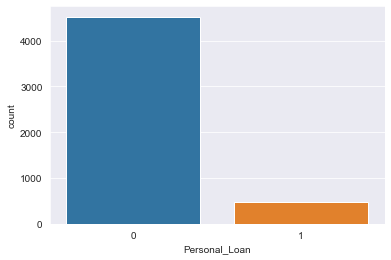

In [100]:
sns.countplot(x='Personal_Loan',data=df)

In [102]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

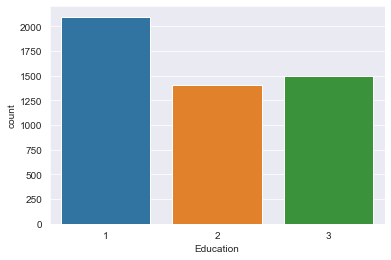

In [103]:
f = sns.countplot(x='Education',data=df)

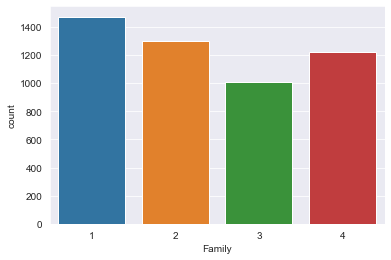

In [101]:
sns.countplot(x='Family',data=df)

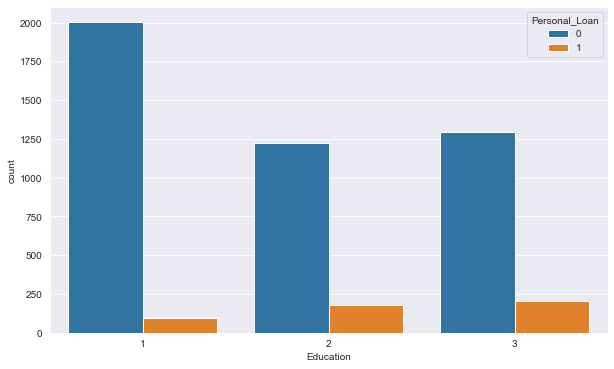

In [104]:
plt.figure(figsize=(10,6))
sns.countplot(x='Education',data=df,hue='Personal_Loan')

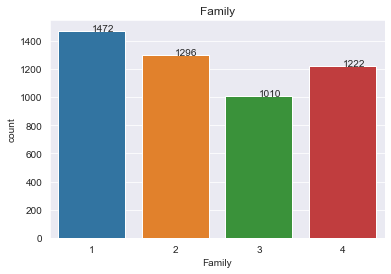

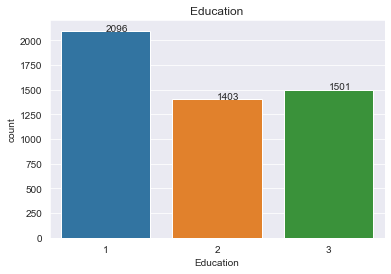

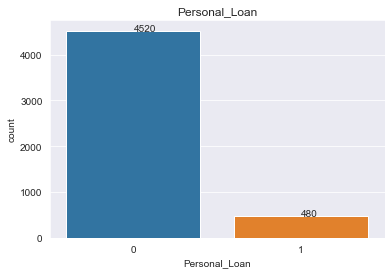

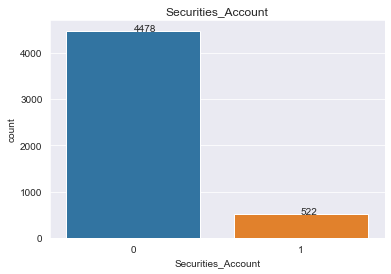

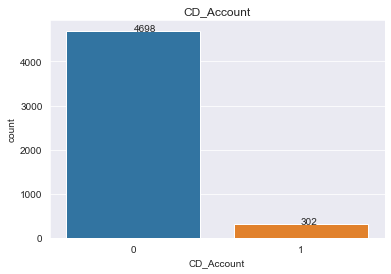

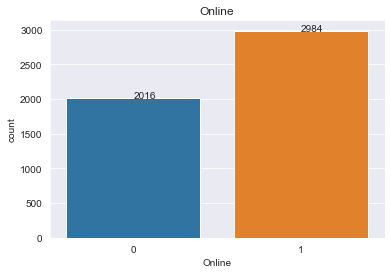

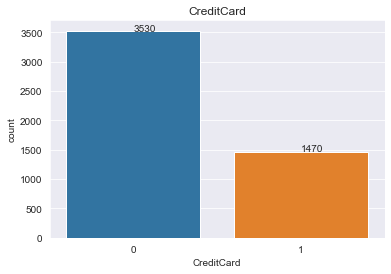

In [105]:
for col in['Family','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']:
    f = sns.countplot(x = col,data = df)
    plt.title(col)
    for i in f.patches:
        x = i.get_x() +i.get_width()/2
        y = i.get_y() + i.get_height()
        plt.annotate(i.get_height(),(x,y))
    plt.show()
                
                   

In [106]:
import warnings
warnings.filterwarnings('ignore')

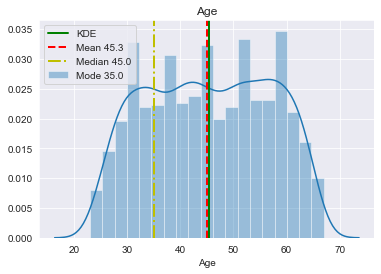

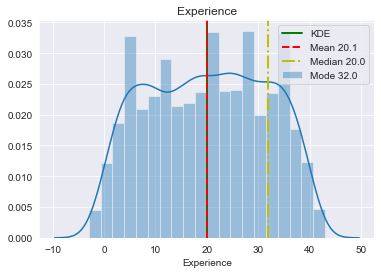

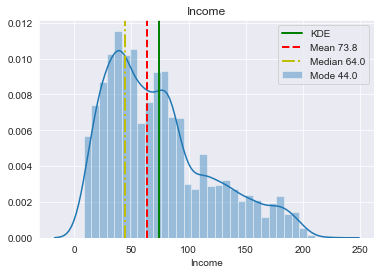

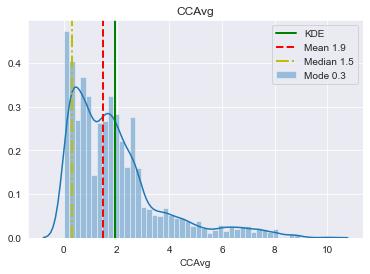

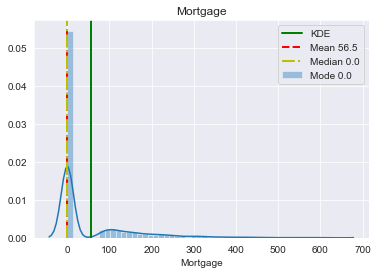

In [107]:
for col in ['Age','Experience','Income','CCAvg','Mortgage']:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().values[0]
    sns.distplot(df[col])
    plt.axvline(mean,color='g',ls='-',lw=2)
    plt.axvline(median,color='r',ls='--',lw=2)
    plt.axvline(mode,color='y',ls='-.',lw=2)
    plt.legend({'KDE':'','Mean %.1f'%mean:mean,'Median %.1f'%median:median,'Mode %.1f'%mode:mode,})
    plt.title(col)
    plt.show()

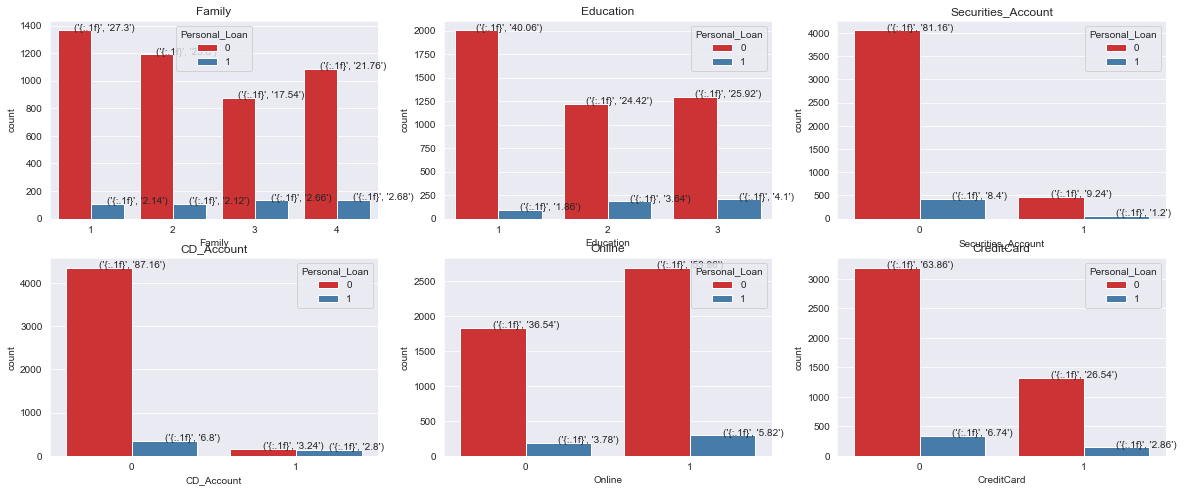

In [114]:
plt.figure(figsize=(20,8))
sns.set_palette('Set1')
for i, col in enumerate(['Family','Education','Securities_Account','CD_Account','Online','CreditCard']):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(x=col,data=df,hue='Personal_Loan')
    plt.title(col)
    for p in ax.patches:
        perc = '{:.1f}',format(100*p.get_height()/len(df[col]))
        x = p.get_x()+p.get_width()/2
        y = p.get_y()+p.get_height()
        plt.annotate(perc,(x,y))

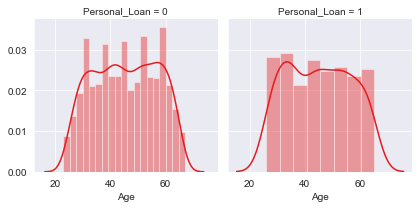

In [134]:
fg = sns.FacetGrid(data=df,col = 'Personal_Loan')
fg.map(sns.distplot,'Age')

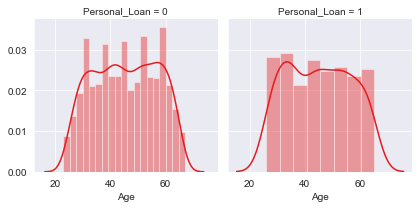

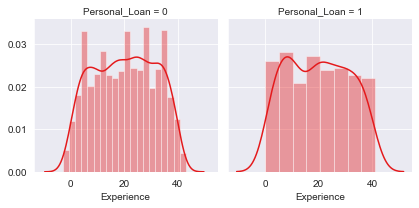

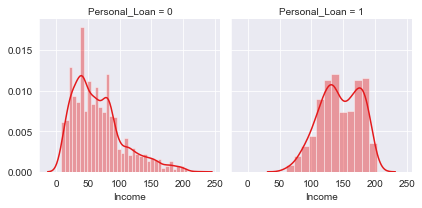

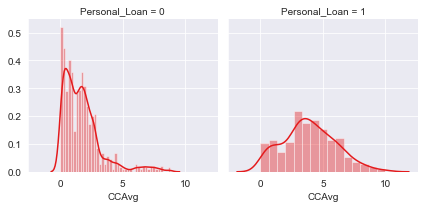

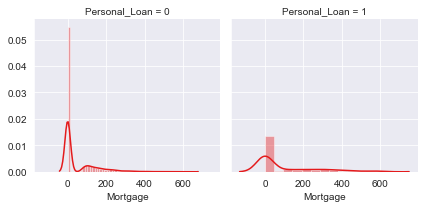

In [133]:
sns.set_palette('Set1')
for col in ['Age','Experience','Income','CCAvg','Mortgage']:
    fg = sns.FacetGrid(data=df,col = 'Personal_Loan')
    fg.map(sns.distplot,col)
    plt.show

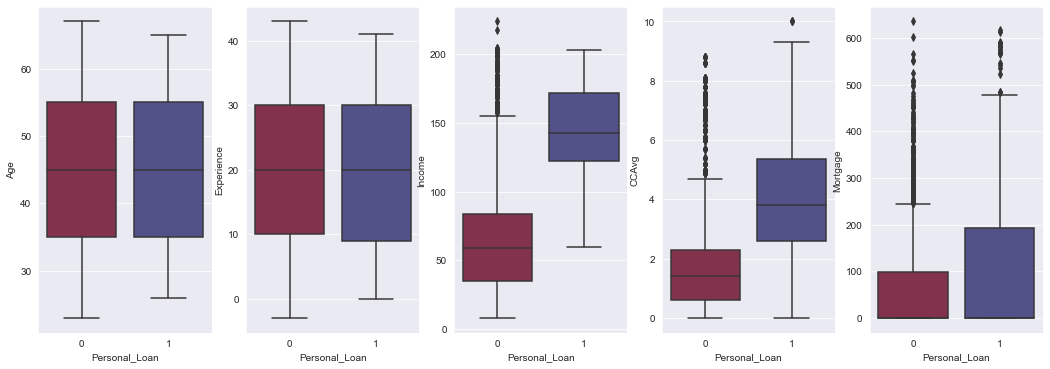

In [140]:
sns.set_palette('gist_stern')
plt.figure(figsize=(18,6))
for i,col in enumerate(['Age','Experience','Income','CCAvg','Mortgage']):
    plt.subplot(1,5,i+1)
    sns.boxplot(x='Personal_Loan',y=col,data=df)

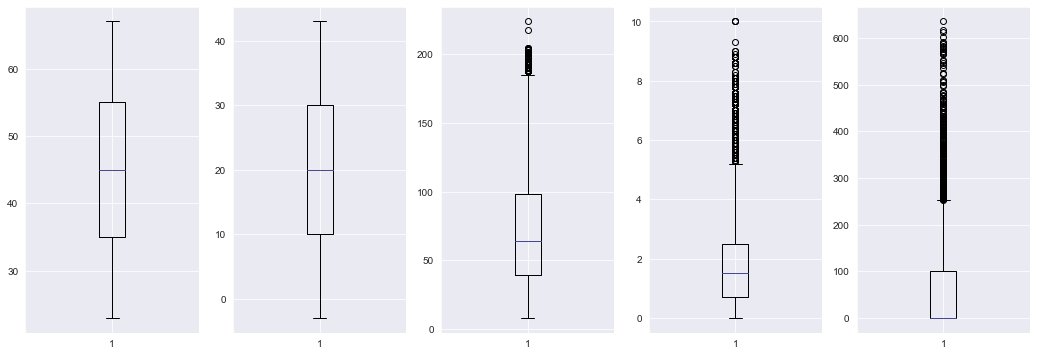

In [142]:
sns.set_palette('gist_stern')
plt.figure(figsize=(18,6))
for i,col in enumerate(['Age','Experience','Income','CCAvg','Mortgage']):
    plt.subplot(1,5,i+1)
    plt.boxplot(x=df[col])

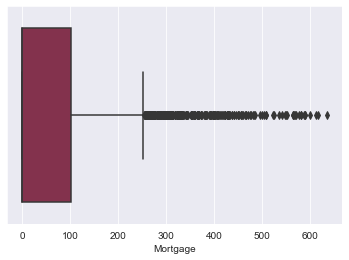

In [143]:
mortg_out = df['Mortgage']
sns.boxplot(x=mortg_out)

In [144]:
q1 = mortg_out.quantile(0.25)
q3 = mortg_out.quantile(0.75)
iqr = q3-q1
print(iqr,q1,q3)

101.0 0.0 101.0


In [145]:
min_q = q1-1.5*iqr
max_q = q3+1.5*iqr
print(min_q,max_q)

-151.5 252.5


In [146]:
mortg_out.shape

(5000,)

In [150]:
mortg_filt=mortg_out[(mortg_out >=min_q)&(mortg_out<=max_q)]

In [153]:
mortg_filt.shape

(4709,)

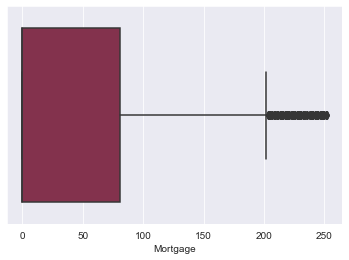

In [154]:
sns.boxplot(x=mortg_filt)

In [155]:
#df['Country'].value_counts()

In [157]:
sns.set_palette('Set2')
plt.figure()
pd.crosstab(index=df['County'],columns = df['Personal_Loan']).plot(kind='barh')

KeyError: 'County'

<Figure size 432x288 with 0 Axes>

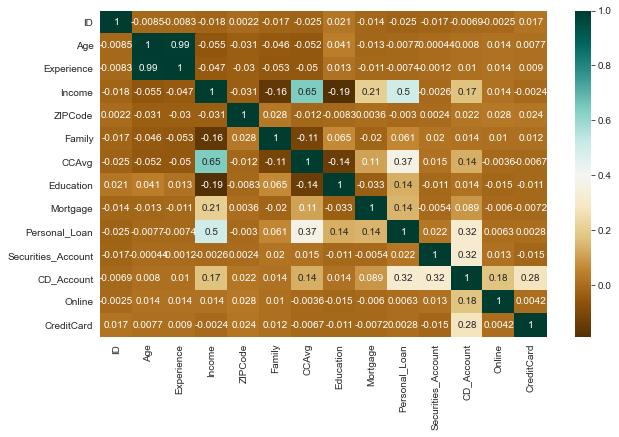

In [158]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='BrBG')

In [159]:
from sklearn.model_selection import train_test_split

In [162]:
df.drop('ID',axis=1,inplace=True)

In [163]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Country
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,US
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,US
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,US
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,US
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,US


In [ ]:
x = df[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities_Account']]